<a href="https://colab.research.google.com/github/guevara001/Challenge_Telecom_X_Parte2/blob/main/Challenge_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción

In [2]:
#importando las librerias necesarias
import requests
import pandas as pd
import numpy as np

In [3]:
url='https://github.com/guevara001/Challenge_Telecom_X_Parte2/blob/main/df_churn.csv'

In [10]:
datos = pd.read_csv(url)

datos.sample(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,TipoServicio
4301,6061-GWWAV,No,Male,0,No,Yes,41,Yes,No,DSL,...,No,Yes,No,One year,No,Mailed check,70.20,2894.55,2.340000,Ambos
781,1136-XGEQU,No,Female,0,Yes,Yes,50,Yes,Yes,DSL,...,Yes,Yes,Yes,One year,Yes,Credit card (automatic),84.15,4164.40,2.805000,Ambos
1051,1536-HBSWP,No,Female,0,No,No,1,Yes,No,DSL,...,Yes,No,No,Month-to-month,Yes,Electronic check,49.90,49.90,1.663333,Ambos


In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [12]:
datos.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [13]:
datos.describe(include='O')

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,TipoServicio
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,3
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Ambos
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,4835


# Multicolinealidad

Del dataframe original encontramos una relacion fuerte entre customer tenure y account Charges Total, de un 0,8258. Puede ser porque mientras mas antiguo el cliente, mas cargos acumula en su cuenta total.

Otra relación fuerte, es cuentas diarias con account.Charges.Monthly, de un 1,00; eliminaremos cuentas diarias.

La variable customerID  no aporta al análisis por lo que también será eliminada, así como la variable TipoServicio, que se creó a partir de las variables PhoneServicio e InternetServicio.

**Eliminación de variables**

In [14]:
datos = datos.drop(columns=['customerID', 'cuentas_diarias', 'TipoServicio'])

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

# Valores faltantes

De datos.info() observamos que la variable account.Charges.Total es la única variable que tiene 7032 registros, 11 menos que el resto del data frame. Considerando que 11 registros son el 0.156% del total, es decir muy poco, eliminaremos estas filas sin registros.

In [16]:
#eliminación de filas con valores faltantes
datos = datos.dropna(subset=["account.Charges.Total"])

In [17]:
datos.shape

(7032, 20)

Ahora tenemos 7032 registros, después de eliminar las filas sin información de Charges.Total.

# Mapa de Calor (HEATMAP)

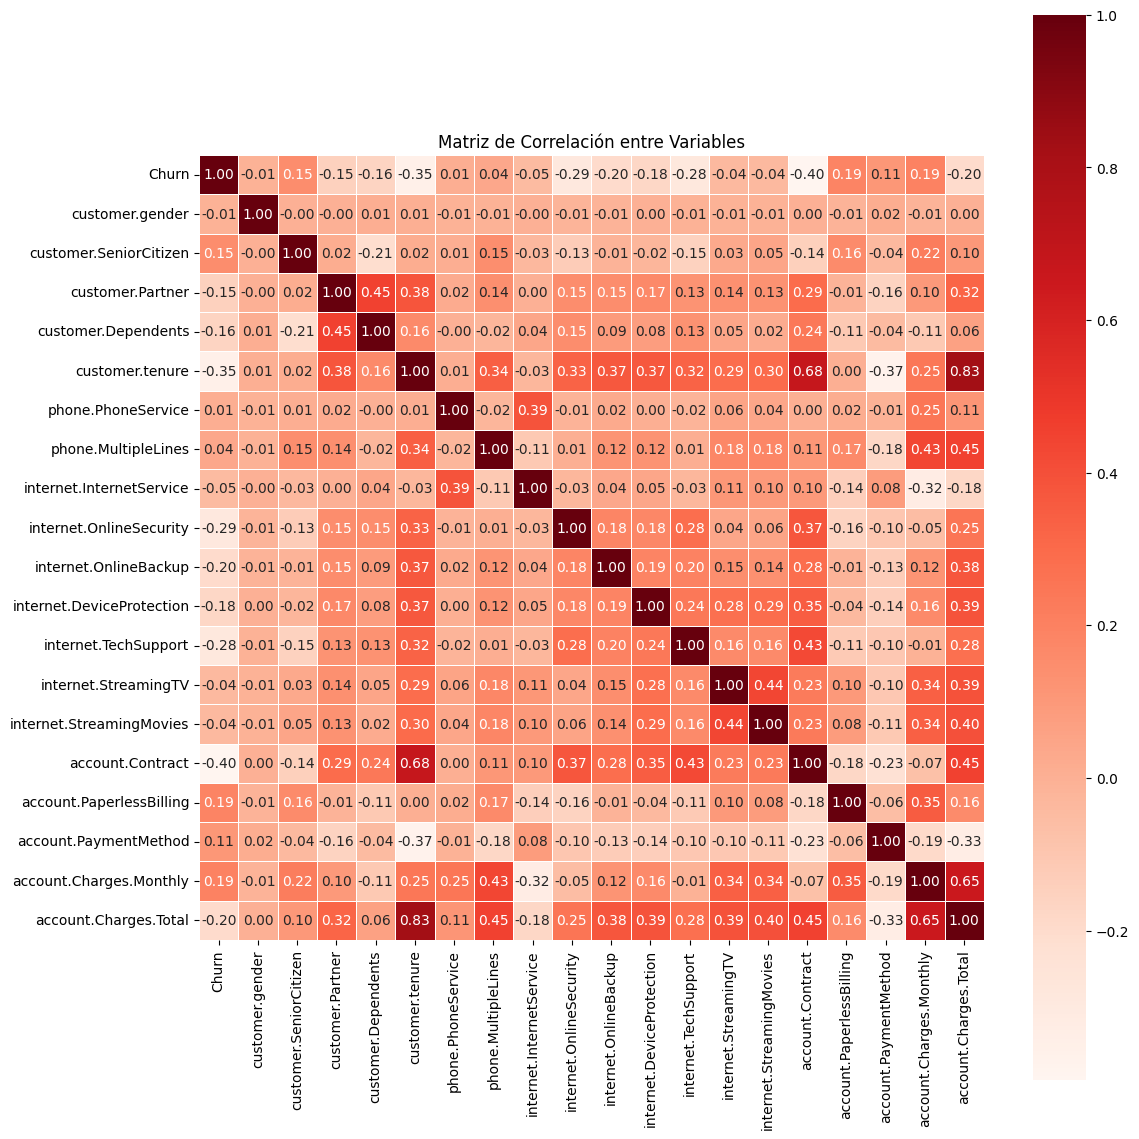

In [22]:
# Mapa de Calor (HEATMAP)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copia del dataframe
df_corr = datos.copy()

# Codificar variables categóricas
label_encoder = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Imputar valores nulos si los hay (por seguridad)
df_corr.fillna(df_corr.median(numeric_only=True), inplace=True)

# Calcular matriz de correlación
matriz_correlacion = df_corr.corr()

# Graficar heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5, square=True)
plt.title("Matriz de Correlación entre Variables", fontsize=12)
plt.tight_layout()
plt.savefig('Matriz_correlación_entre_variables.png', dpi=120)
plt.show()

Mirando el heatmap, observamos otras correlaciones fuertes como customer.Tenure y account.contract de un 0.67.
Internet.service y TipoServicio de un 0.66

# Agrupación de No y No service

Objetivo

Reducir multicolinealidad y simplificar los datos sin perder relevancia para el modelo predictivo.

Las variables **internet.OnlineBackup, internet.OnlineSecurity, internet.DeviceProtection, internet.TechSupport, internet.StreamingTV, internet.StreamingMovies**, tienen tres categorías,

"Yes" → cliente usa el servicio
"No" → cliente tiene internet, pero no contrató el servicio
"No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

Esto genera multicolinealidad perfecta al transformar estas categorías en dummies, lo que:

Creaba correlación 1.0 entre variables
Generaba VIF infinito
Comprometía la estabilidad y el rendimiento de los modelos
 La solución: agrupar "No internet service" como "No"

Agrupamos "No internet service" como "No" para simplificar la variable:

Ahora: "Yes" = usa el servicio "No" = no usa el servicio (por cualquier motivo)
Esto reduce la dimensionalidad y evita multicolinealidad.

La información de que el cliente no tiene internet sigue estando en la variable InternetService.

 ¿Y el impacto?

Perdemos un matiz (por qué el cliente no usa el servicio), pero:

Esto rara vez afecta el rendimiento del modelo
Ganamos más robustez, menos ruido y menos redundancia

In [23]:
# Agrupar "No internet service" como "No"
cols_to_fix = ['internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_to_fix:
    datos[col] = datos[col].replace('No internet service', 'No')

datos.sample(3)


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1980,Yes,Female,1,No,No,4,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,346.20
4253,Yes,Male,0,No,No,12,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,56.65,654.85
6027,No,Male,0,Yes,Yes,52,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,1345.85


# Feature Encoding

Los modelos de Machine Learning funcionan mejor cuando tenemos los datos codificados, es decir, variables numéricas. Sin embargo, en muchos casos nuestras variables no son numéricas, sino de otro tipo, como cadenas de caracteres o booleanas.

Transformaremos las variables que son categoricas, No y Yes, a 0 y 1.

In [26]:
datos['Churn']= datos['Churn'].replace({'Yes':0, 'No':1})
datos['customer.gender']= datos['customer.gender'].replace({'Male':0, 'Female':1})
datos['customer.Partner']= datos['customer.Partner'].replace({'Yes':0, 'No':1})
datos['customer.Dependents']= datos['customer.Dependents'].replace({'Yes':0, 'No':1})
datos['phone.PhoneService']= datos['phone.PhoneService'].replace({'Yes':0, 'No':1}).astype(int)
datos['account.PaperlessBilling']= datos['account.PaperlessBilling'].replace({'Yes':0, 'No':1})

datos['internet.OnlineSecurity']= datos['internet.OnlineSecurity'].replace({'Yes':0, 'No':1})
datos['internet.OnlineBackup']= datos['internet.OnlineBackup'].replace({'Yes':0, 'No':1})
datos['internet.DeviceProtection']= datos['internet.DeviceProtection'].replace({'Yes':0, 'No':1})
datos['internet.TechSupport']= datos['internet.TechSupport'].replace({'Yes':0, 'No':1})
datos['internet.StreamingTV']= datos['internet.StreamingTV'].replace({'Yes':0, 'No':1})
datos['internet.StreamingMovies']= datos['internet.StreamingMovies'].replace({'Yes':0, 'No':1})

datos.sample(3)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5089,1,0,0,0,0,55,0,No,Fiber optic,1,0,1,0,1,1,Month-to-month,1,Electronic check,79.4,4238.45
2631,1,1,0,1,1,3,0,No,No,1,1,1,1,1,1,Month-to-month,1,Electronic check,20.2,65.95
1153,1,0,1,0,1,19,0,No,DSL,0,1,0,1,0,1,Month-to-month,1,Bank transfer (automatic),66.4,1286.05


# One Hot Encoder - datos_transformados

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas=['phone.MultipleLines', 'internet.InternetService',
             'account.Contract','account.PaymentMethod']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos_transformados = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos_transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__phone.MultipleLines_No                           7032 non-null   float64
 1   onehotencoder__phone.MultipleLines_No phone service             7032 non-null   float64
 2   onehotencoder__phone.MultipleLines_Yes                          7032 non-null   float64
 3   onehotencoder__internet.InternetService_DSL                     7032 non-null   float64
 4   onehotencoder__internet.InternetService_Fiber optic             7032 non-null   float64
 5   onehotencoder__internet.InternetService_No                      7032 non-null   float64
 6   onehotencoder__account.Contract_Month-to-month                  7032 non-null   float64
 7   onehotencoder__account.Contract_One year           

In [28]:
datos_transformados.sample(3)

,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__account.Contract_Month-to-month,onehotencoder__account.Contract_One year,onehotencoder__account.Contract_Two year,onehotencoder__account.PaymentMethod_Bank transfer (automatic),...,remainder__phone.PhoneService,remainder__internet.OnlineSecurity,remainder__internet.OnlineBackup,remainder__internet.DeviceProtection,remainder__internet.TechSupport,remainder__internet.StreamingTV,remainder__internet.StreamingMovies,remainder__account.PaperlessBilling,remainder__account.Charges.Monthly,remainder__account.Charges.Total
5462,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,81.00,1917.10
4322,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,39.50,1082.75
3765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,92.85,5980.75


# Verificación de la Proporción de Cancelación (Churn)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

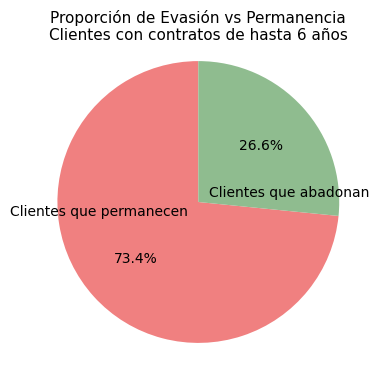

In [32]:
# Conteo de valores
valores = datos_transformados['remainder__Churn'].value_counts()
etiquetas = valores.index
colores = ['lightcoral', 'darkseagreen']  # Using valid color names
# Etiquetas personalizadas
etiquetas = ['Clientes que permanecen', 'Clientes que abadonan']

plt.figure(figsize=(4,4))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, labeldistance=0.1)
plt.title('Proporción de Evasión vs Permanencia\nClientes con contratos de hasta 6 años',fontsize=11)

plt.axis('equal')
plt.savefig('Clientes_Proporcion_Evasion_Permanencia.png', dpi=120)
plt.show()

# Análisis Dirigido

Investigaremos cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utilizaremos gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

/tmp/ipython-input-3143399584.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


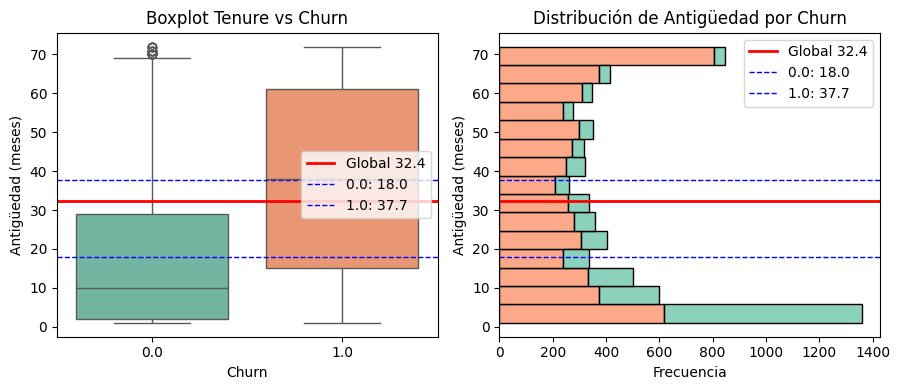

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Promedio por grupo
mean_tenure_group = datos_transformados.groupby("remainder__Churn")["remainder__customer.tenure"].mean()
# Promedio global
mean_tenure_global = datos_transformados["remainder__customer.tenure"].mean()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# --- Boxplot ---
sns.boxplot(
    data=datos_transformados,
    x="remainder__Churn",
    y="remainder__customer.tenure",
    ax=axes[0],
    palette="Set2"
)
axes[0].set_title("Boxplot Tenure vs Churn")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Antigüedad (meses)")

# Línea global
axes[0].axhline(mean_tenure_global, color="red", linestyle="-", linewidth=2, label=f"Global {mean_tenure_global:.1f}")

# Líneas por grupo
for cat, avg in mean_tenure_group.items():
    axes[0].axhline(avg, color="blue", linestyle="--", linewidth=1, label=f"{cat}: {avg:.1f}")

axes[0].legend()

# --- Histograma horizontal ---
sns.histplot(
    data=datos_transformados,
    y="remainder__customer.tenure",
    hue="remainder__Churn",
    multiple="stack",
    ax=axes[1],
    palette="Set2"
)
axes[1].set_title("Distribución de Antigüedad por Churn")
axes[1].set_xlabel("Frecuencia")
axes[1].set_ylabel("Antigüedad (meses)")

# Línea global
axes[1].axhline(mean_tenure_global, color="red", linestyle="-", linewidth=2, label=f"Global {mean_tenure_global:.1f}")

# Líneas por grupo
for cat, avg in mean_tenure_group.items():
    axes[1].axhline(avg, color="blue", linestyle="--", linewidth=1, label=f"{cat}: {avg:.1f}")

axes[1].legend()

plt.tight_layout()
plt.show()

En color verde se observa los churn (abandono), en naranjo los que permanecen. Customer.tenure son los meses de antigüedad del contrato.

El promedio del antiguedad de los que permanecen es de 37.6, y de los churn es de 18, es decir, los churn se retirarn en promedio en la mitad del tiempo de los que si permanencen con el contrato.

## 1. Boxplot de tenure vs Churn

#### Los clientes que no abandonan (Churn = No) muestran valores de antigüedad mucho más altos:

#### La mediana está cerca de los 30 meses.

#### Tienen una dispersión amplia, con bastantes clientes de 50–70 meses.

#### Los que sí abandonan (Churn = Sí) tienen antigüedad mucho menor:

#### Mediana cercana a los 10 meses.

#### Se concentran en contratos de corto plazo.

#### Conclusión: la antigüedad es un fuerte predictor de permanencia. A mayor tiempo de contrato, menos probabilidad de churn.

## 2. Histograma de distribución tenure por Churn

#### Clientes que abandonan se concentran en los primeros meses (0–12).

#### Clientes que no abandonan tienen una distribución más plana, pero con picos en 24, 36, 48 y 60 meses (posiblemente asociados a renovaciones de contrato anual/bianual).

#### La línea global (roja) se sitúa alrededor de 32 meses, mientras que los promedios por grupo (azules) confirman la diferencia:

#### No abandonan ≈ 38 meses.

#### Sí abandonan ≈ 18 meses.

### Se observa un patrón de abandono temprano: quienes se quedan más de ~24 meses, en general permanecen.

/tmp/ipython-input-725690318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


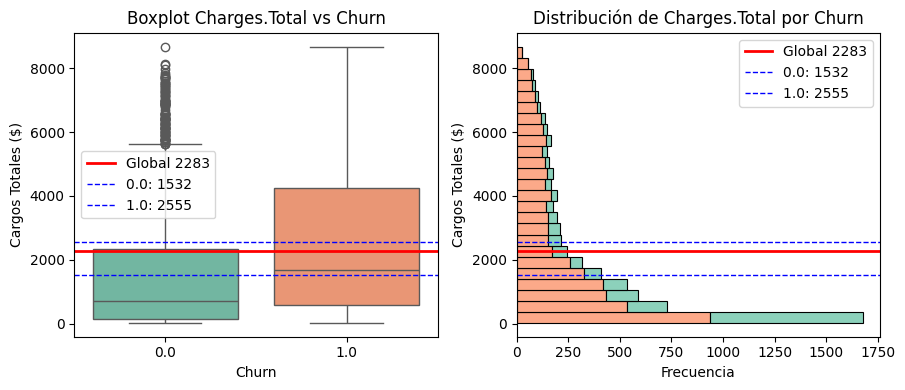

In [43]:
# Promedio por grupo
mean_charges_group = datos_transformados.groupby("remainder__Churn")["remainder__account.Charges.Total"].mean()
# Promedio global
mean_charges_global = datos_transformados["remainder__account.Charges.Total"].mean()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# --- Boxplot ---
sns.boxplot(
    data=datos_transformados,
    x="remainder__Churn",
    y="remainder__account.Charges.Total",
    ax=axes[0],
    palette="Set2"
)
axes[0].set_title("Boxplot Charges.Total vs Churn")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Cargos Totales ($)")

# Línea global
axes[0].axhline(mean_charges_global, color="red", linestyle="-", linewidth=2, label=f"Global {mean_charges_global:.0f}")

# Líneas por grupo
for cat, avg in mean_charges_group.items():
    axes[0].axhline(avg, color="blue", linestyle="--", linewidth=1, label=f"{cat}: {avg:.0f}")

axes[0].legend()

# --- Histograma horizontal ---
sns.histplot(
    data=datos_transformados,
    y="remainder__account.Charges.Total",
    hue="remainder__Churn",
    multiple="stack",
    ax=axes[1],
    palette="Set2"
)
axes[1].set_title("Distribución de Charges.Total por Churn")
axes[1].set_xlabel("Frecuencia")
axes[1].set_ylabel("Cargos Totales ($)")

# Línea global
axes[1].axhline(mean_charges_global, color="red", linestyle="-", linewidth=2, label=f"Global {mean_charges_global:.0f}")

# Líneas por grupo
for cat, avg in mean_charges_group.items():
    axes[1].axhline(avg, color="blue", linestyle="--", linewidth=1, label=f"{cat}: {avg:.0f}")

axes[1].legend()

plt.tight_layout()
plt.show()

## 3. Boxplot de Charges.Total vs Churn

#### Churn = Sí: muestran cargos totales mucho más bajos, mediana cercana a los 500 dólares.

#### Churn = No: tienen cargos totales mucho más altos, mediana cercana a los 2,000 dólares y con casos que superan los 6,000.

#### Esto refleja que los que se quedan generan mucho más revenue acumulado (tienen más meses en la compañía).

### Conclusión: el churn impacta fuertemente en el ingreso total: clientes que abandonan no alcanzan a generar ingresos relevantes.

## 4. Histograma de distribución Charges.Total por Churn

#### Churn = Sí: distribución concentrada en cargos bajos (<1000).

#### Churn = No: distribución extendida hacia montos altos, incluso con un grupo importante por encima de los 4000.

#### Línea global (roja) ≈ 2300.

#### Promedios por grupo (azules):

#### Sí abandonan ≈ 1500.

#### No abandonan ≈ 2700.

### Evidencia clara de que clientes que se mantienen generan más del doble en ingresos acumulados respecto a los que abandonan.

 En conjunto:

tenure y Charges.Total muestran la misma tendencia: clientes con mayor permanencia → mayor revenue → menor probabilidad de churn.

Hay un grupo crítico: clientes que abandonan dentro del primer año, representando la mayor parte del churn.

Esto sugiere que estrategias de retención deben enfocarse en los primeros meses del contrato, donde la tasa de abandono es máxima.

# Separación y balanceo de datos

Churn es una variable categórica (Sí/No, 1/0) → entonces el problema es de clasificación, por lo que utilizaremos RandomForestClassifier. Lo que queremos es estimar la probabilidad de que una observación pertenezca a una clase específica, en este caso Churn.

Además, nos encontramos ante una situación en la que nuestro conjunto de datos está desbalanceado. Hay una clase predominante, que es la clase "permanecen", que corresponden al 73.5% y un 26.5% churn, es decir, que abandonan el servicio contratado.

Para balancear los datos vamos a aplicar oversampling con una técnica llamada SMOTE, que genera datos sintéticos a partir de la clase que es la minoría, que sería "churn".

Respecto a SMOTE y train_test_split:

Primero haremos el split (train_test_split), para separar en entrenamiento y prueba.

Luego, aplicaremos SMOTE SOLO al conjunto de entrenamiento, nunca al de prueba.

Si balanceamos todo el dataset antes de dividir, vamos a “contaminar” la prueba con datos sintéticos (data leakage), y la métrica será demasiado optimista.

In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Separar X e y
X = datos_transformados.drop(columns='remainder__Churn', axis=1)
y= datos_transformados.remainder__Churn   # 0 = No abandona, 1 = Sí abandona

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y )

# 3. Balancear SOLO el entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Modelo RandomForestClassifier con oversampling

Exactitud: 0.7900473933649289
Precisión: 0.841358024691358
Recall: 0.8799225306649451
F1-score: 0.8602082675923004
ROC-AUC: 0.8266571843832315

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.62      0.54      0.58       561
         1.0       0.84      0.88      0.86      1549

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



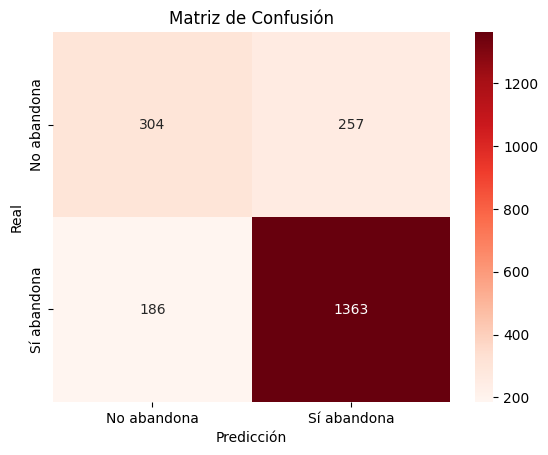

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar modelo
modelo = RandomForestClassifier(
    n_estimators=200,  # puedes tunearlo
    max_depth=None,
    random_state=42
)
modelo.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred = modelo.predict(X_test)
y_pred_proba = modelo.predict_proba(X_test)[:,1]

# Métricas
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

#  Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No abandona","Sí abandona"], yticklabels=["No abandona","Sí abandona"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [46]:
y_train_bal.value_counts()

,count
remainder__Churn,
1.0,3614
0.0,3614


 **Métricas globales con Random Forest Classifier**

*Exactitud (Accuracy = 0.79)
El modelo clasifica correctamente el 79% de los clientes.
Considerar qu eel dataset está desbalanceado, así que la exactitud no siempre es lo más fiable.

*Precisión (Precision = 0.84)
De todos los clientes que el modelo predijo como churn (1), un 84% efectivamente abandonaron.
-> Es buena, significa pocas falsas alarmas.

*Recall (Sensibilidad = 0.88)
De todos los clientes que realmente abandonaron, el modelo detectó al 88%.
-> Muy bueno: casi no se le escapan clientes que cancelan.

*F1-score (0.86)
Es el equilibrio entre precisión y recall. Tu modelo logra un balance alto.

*ROC-AUC (0.83)
Buena capacidad de discriminación: el modelo distingue bastante bien entre los que abandonan y los que no.

**Reporte de clasificación por clase**

Clase 0.0 (No churn):

Precisión = 0.62 → Cuando predice que alguien no abandona, acierta el 62%.

Recall = 0.54 → Solo logra detectar al 54% de los clientes que realmente no abandonan.

F1 = 0.58 → Bastante más bajo.
- El modelo tiene problemas para identificar bien a los que se quedan.

Clase 1.0 (Churn):

Precisión = 0.84 → Cuando dice que alguien abandona, casi siempre tiene razón.

Recall = 0.88 → Detecta al 88% de los que realmente abandonan.

F1 = 0.86 → Muy sólido.
- El modelo está claramente enfocado en predecir el churn y lo hace muy bien.

Interpretación general

**El modelo es fuerte prediciendo quién abandona (1.0) → lo cual es justo lo que más te interesa para anticiparte a la pérdida de clientes. Esto permitiría
destinar recursos en un grupo reducido de clientes, pero con una alta probabilidad de detección temprana de fugas.**

Sin embargo, es más débil detectando quién NO abandona (0.0) → lo que podría significar que “sobrerrepresenta” un poco el churn.

Con un AUC = 0.83, el modelo tiene una buena capacidad de discriminación en general.

# Modelo LogisticRegression con oversampling

Exactitud: 0.8018957345971564
Precisión: 0.8446069469835467
Recall: 0.894770819883796
F1-score: 0.8689655172413793
ROC-AUC: 0.8448599464435108

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.65      0.55      0.59       561
         1.0       0.84      0.89      0.87      1549

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



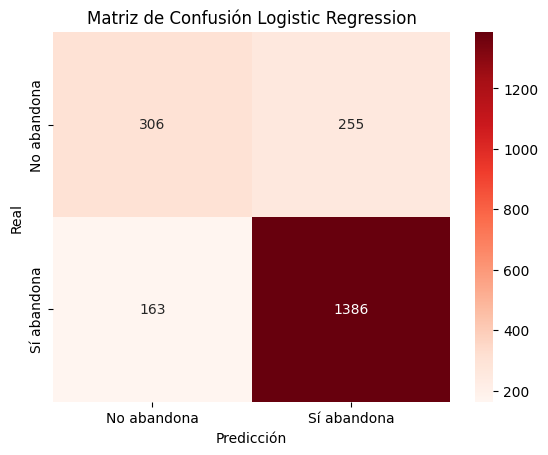

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Normalizar variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar Logistic Regression
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train_scaled, y_train)

# Paso 6: Predicciones
y_pred = modelo_lr.predict(X_test_scaled)
y_prob = modelo_lr.predict_proba(X_test_scaled)[:,1]

# Paso 7: Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Exactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Paso 8: Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No abandona","Sí abandona"],
            yticklabels=["No abandona","Sí abandona"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión Logistic Regression")
plt.show()


** Métricas globales**

*Exactitud (80%):
Mejor que Random Forest (79%). Indica que el modelo clasifica correctamente el 80% de los clientes.

*Precisión (84%):
Similar a Random Forest. De todos los clientes que predijo como “churn”, un 84% efectivamente abandonaron.

*Recall (89%):
Superior a Random Forest (88%). Detecta más clientes que realmente abandonan.

*F1-score (87%):
Ligero aumento respecto a Random Forest (86%). Buen balance entre precisión y recall.

*ROC-AUC (0.845):
Mejor que Random Forest (0.826). El modelo discrimina un poco mejor entre quienes abandonan y quienes no.

**Reporte de clasificación por clase**

Clase 0 (No abandona)

Precisión = 0.65 → Mejor que Random Forest (0.62).

Recall = 0.55 → Similar al RF (0.54).

F1 = 0.59 → Ligeramente mejor que RF (0.58).
→ Todavía más difícil predecir a los que no abandonan.

Clase 1 (Sí abandona)

Precisión = 0.84 → Igual que RF.

Recall = 0.89 → Mejor que RF (0.88).

F1 = 0.87 → Mejor que RF (0.86).
→ Detecta un poco más a los clientes que realmente abandonan.

**Interpretación general**

Logistic Regression mejora ligeramente la detección de churn (recall y F1 más altos).

Todavía le cuesta predecir bien los clientes que se quedan (clase 0), al igual que Random Forest.

ROC-AUC más alto (0.845) indica mejor capacidad de discriminación general.

Para estrategia de retención, el modelo cumple muy bien, ya que captura casi todos los clientes que abandonarían.

**Conclusión**

Ambos modelos cumplen su objetivo: anticipar clientes que se van.

Logistic Regression ligeramente superior en recall y ROC-AUC.

Si el foco es minimizar churn, Logistic Regression podría ser ligeramente mejor.

Si quieres un modelo más robusto a relaciones no lineales y con menor preprocesamiento, Random Forest sigue siendo excelente.

# Análisis de la Importancia de las Variables

**Análisis con Random forest**

onehotencoder__account.Contract_Month-to-month                    0.116521
remainder__account.Charges.Total                                  0.114741
remainder__account.Charges.Monthly                                0.102982
remainder__customer.tenure                                        0.102139
onehotencoder__account.PaymentMethod_Electronic check             0.085138
remainder__account.PaperlessBilling                               0.047227
onehotencoder__account.Contract_Two year                          0.039986
remainder__internet.OnlineSecurity                                0.037592
onehotencoder__internet.InternetService_Fiber optic               0.036142
remainder__customer.Partner                                       0.033569
remainder__internet.TechSupport                                   0.029051
remainder__customer.Dependents                                    0.024992
remainder__customer.gender                                        0.024041
onehotencoder__account.Co

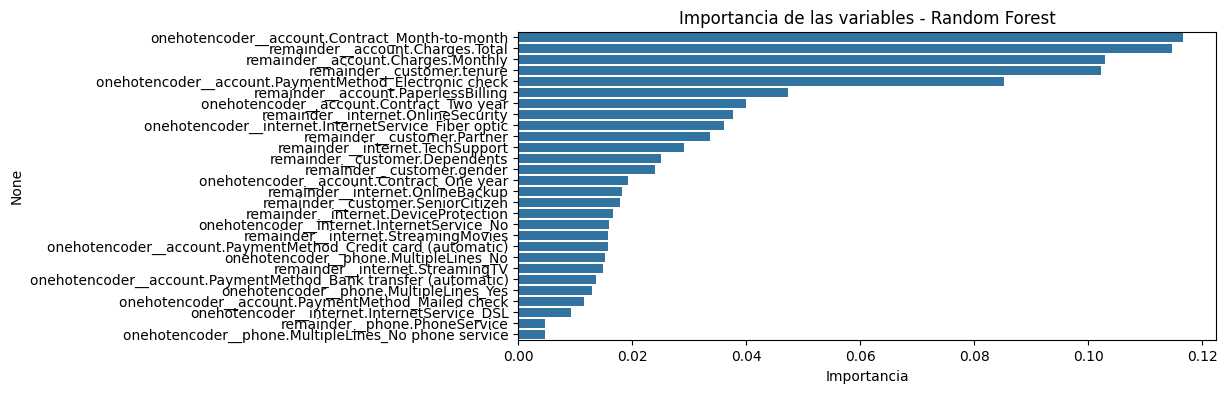

In [51]:
# modelo random forest
importances = pd.Series(modelo.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

print(importances)

# Visualización
plt.figure(figsize=(9,4))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importancia de las variables - Random Forest")
plt.xlabel("Importancia")
plt.show()

En Random Forest, la importancia de cada variable se calcula por cómo contribuye a reducir la impureza (Gini o Entropía) en los nodos de los árboles.

* Variables con mayor valor → contribuyen más a la predicción de churn.

* Es un indicador relativo, no absoluto como en la regresión logística.

* Muy útil para identificar factores clave de abandono y priorizar acciones de retención.

Las variables mas importantes que a tener presente para reterner clientes Churn según este modelo serían:

Contract_Month-to-month: Clientes con contrato mensual tienen más riesgo de churn que los de contrato anual o bienal

Charges.Total: Clientes con cargos altos o inusuales podrían abandonar más.

Charges.Monthly                                0.102982

customer.tenur: Menor tenure, mayor probabilidad de churn; los nuevos clientes son más propensos a irse.

PaymentMethod_Electronic check : Pago por cheque electrónico se asocia a mayor churn que pagos automáticos o en efectivo.

PaymentMethod_Electronic check             0.085138

PaperlessBilling                               0.047227

Contract_Two year                          0.039986

OnlineSecurity                                0.037592

InternetService_Fiber optic               0.036142

customer.Partner                                       0.033569

internet.TechSupport                                   0.029051

customer.Dependents                                    0.024992

customer.gender                                        0.024041

**Análisis con Logistic Regressor**

remainder__customer.tenure                                        1.451605
remainder__account.Charges.Total                                 -0.700488
onehotencoder__internet.InternetService_No                        0.449397
onehotencoder__internet.InternetService_Fiber optic              -0.419156
onehotencoder__account.Contract_Two year                          0.332913
onehotencoder__account.Contract_Month-to-month                   -0.291490
remainder__account.Charges.Monthly                                0.240695
remainder__internet.OnlineSecurity                               -0.181156
remainder__account.PaperlessBilling                               0.173687
onehotencoder__account.PaymentMethod_Electronic check            -0.138787
remainder__internet.TechSupport                                  -0.134711
remainder__internet.StreamingTV                                   0.127868
remainder__internet.StreamingMovies                               0.110229
onehotencoder__phone.Mult

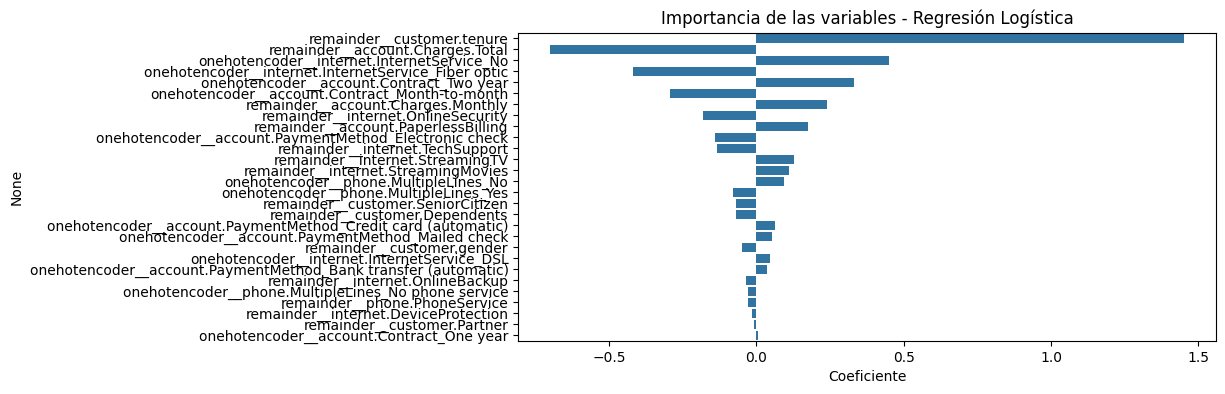

In [52]:
# Reconstruimos con nombres de columnas
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Coeficientes del modelo
coeficientes = pd.Series(modelo_lr.coef_[0], index=X_train_df.columns)
coeficientes = coeficientes.sort_values(key=abs, ascending=False)  # ordenadas por magnitud

print(coeficientes)

# Visualización
plt.figure(figsize=(9,4))
sns.barplot(x=coeficientes.values, y=coeficientes.index)
plt.title("Importancia de las variables - Regresión Logística")
plt.xlabel("Coeficiente")
plt.show()

Variables con coeficiente positivo

Signo positivo (+) a mayor valor de la variable, más probabilidad de churn (Churn=1 / sí abandona).

remainder__customer.tenure (1.4516)

Valor alto → mayor probabilidad de churn.

Esto podría ser contraintuitivo; revisa la escala o codificación, porque normalmente menor tenure implica más churn.

onehotencoder__internet.InternetService_No (0.4494)

Clientes sin servicio de Internet tienen mayor riesgo de abandono.

onehotencoder__account.Contract_Two year (0.3329)

Coeficiente positivo → sugiere que tener contrato de 2 años aumenta churn según el modelo.

Esto también podría ser un efecto de codificación o correlación con otras variables.

remainder__account.Charges.Monthly (0.2407)

A mayor pago mensual, mayor probabilidad de churn.

remainder__account.PaperlessBilling (0.1737)

Paperless Billing aumenta ligeramente la probabilidad de churn.

# Conclusiones

Los modelos pueden predecir churn con buena precisión y recall, lo que permite anticipar cancelaciones.

Variables más influyentes: tipo de contrato, cargos, antigüedad, método de pago y servicios adicionales.

Estrategia de retención: priorizar clientes con contratos mensuales, pagos electrónicos o baja tenure para acciones preventivas.

Comparación de modelos:

Logistic Regression → ligeramente mejor en recall y ROC-AUC, interpretabilidad clara.

Random Forest → robusto, maneja relaciones no lineales y es más flexible con preprocesamiento.

En general, ambos modelos son útiles; la elección depende de si priorizas interpretabilidad (Logistic Regression) o robustez frente a interacciones complejas (Random Forest).

In [53]:
import requests
import os

url = 'https://raw.githubusercontent.com/guevara001/Challenge_Telecom_X_Parte2/main/df_churn.csv'
response = requests.get(url)

# Create the content directory if it doesn't exist
if not os.path.exists('content'):
    os.makedirs('content')

# Save the file to the content directory
with open('content/df_churn.csv', 'wb') as f:
    f.write(response.content)

# Read the data into a pandas DataFrame
datos = pd.read_csv('content/df_churn.csv')
datos.sample(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,TipoServicio
5324,7520-HQWJU,No,Female,0,Yes,Yes,66,Yes,Yes,DSL,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),67.45,4508.65,2.248333,Ambos
3728,5243-SAOTC,No,Male,0,No,No,54,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.85,4308.25,2.661667,Ambos
6425,9099-FTUHS,No,Female,0,No,No,23,Yes,Yes,DSL,...,No,No,No,Month-to-month,No,Electronic check,54.40,1249.25,1.813333,Ambos
